<a href="https://colab.research.google.com/github/DaviHorner/1-Palestra-do-Grupo-de-PLN-IA-WordEmbeddings/blob/main/Tutorial_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Word Embeddings

### Essa é a primeira palestra do grupo de PLN-IA 




# O que é Word Embeddings

Analise semântica:

O que essas palavras tem em comum? 

mulher -> homem

mulher -> rainha

mulher -> rei

homem -> rei

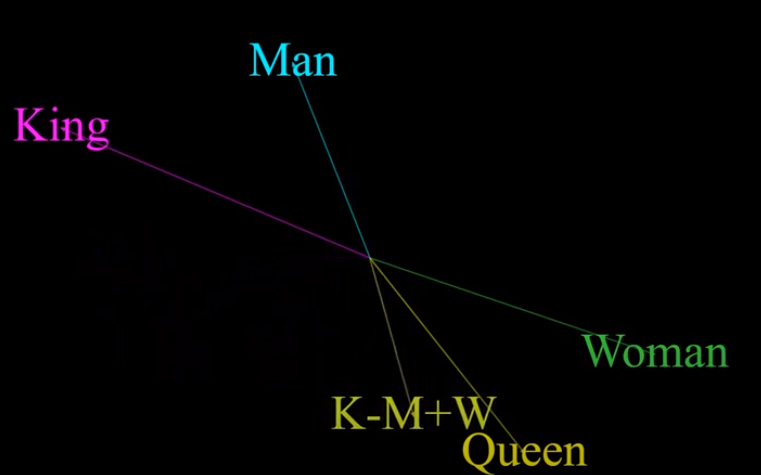

Word Embeddings é a forma utilizada para dar valores numericos a palavras ou frases, a forma de se fazer isso é montar uma matriz Mpp onde p é todas as palavras, por isso antes de montar a matriz e bom fazer uma limpeza das palavras, por exemplo artigos e preposição depedendo da situação não é necessário. Dai fazendo essa matriz e colocando valores nas posições referentes a relação das palavras, podemos chegar a conclusão que mulher e mais proxima de garota e rainha do que ovo, mas isso tambem depende do tipo de texto que estamos utilizando pois se usarmos um artigo de biologia, pode ser que apresente uma relação maior de mulher com ovo que um artigo de história por isso a origem e a lingua do word embeddings é tão importante. 

n-dimensional dense

embedding_layer = Embedding(200, 32, input_length=50)

[Aula](https://www.youtube.com/watch?v=gQddtTdmG_8)

[Baixe esse texto](http://www.gutenberg.org/cache/epub/55752/pg55752.txt)



In [47]:
!pip install nltk
!pip install gensim
from google.colab import files
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
nltk.download('punkt')  
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec


sample = files.upload()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Saving dom.txt to dom (2).txt


In [48]:

def filtrar_palavras(sentenca):
  return [word.lower() for word in nltk.word_tokenize(sentenca) if word.isalnum()]


def tokenize(texto):
  return [filtrar_palavras(setenca) for setenca in nltk.sent_tokenize(texto)]  

  
sentencas = []

data_path = "dom.txt"

with open(data_path, 'r') as f:
  texto = f.read()
  sentencas.extend(tokenize(texto))

  
# Create CBOW model The way CBOW work is that it tends to predict the probability of a word given a context
modelo1 = gensim.models.Word2Vec(sentencas,  min_count = 1, size = 100, window = 5)


print(modelo1.most_similar_cosmul(positive=['capitú'],negative=['com']))
print(modelo1.similar_by_word('capitú'))  
print(modelo2.similar_by_word('escobar'))
print(modelo1.similar_by_word('mar'))  

# Create Skip Gram model . Skip-gram is one of the unsupervised learning techniques used to find the most related words for a given word
modelo2 = gensim.models.Word2Vec(sentencas, min_count = 1, size = 100, window = 5, sg = 1)

print(modelo2.most_similar_cosmul(positive=['capitú'],negative=['entre']))
print(modelo2.similar_by_word('capitú')) 
print(modelo2.similar_by_word('escobar'))
print(modelo2.similar_by_word('mar'))  
 

[('matou', 1.0061906576156616), ('atinava', 1.0040825605392456), ('concedeu', 1.0039055347442627), ('aro', 1.0037072896957397), ('diffuso', 1.0035789012908936), ('etc', 1.0034657716751099), ('tirava', 1.0032739639282227), ('gravidade', 1.0032703876495361), ('censurava', 1.0032459497451782), ('trocariam', 1.0031533241271973)]
[('e', 0.9999675750732422), ('com', 0.999967098236084), ('a', 0.9999666213989258), ('como', 0.999962329864502), ('de', 0.9999618530273438), ('um', 0.9999595880508423), ('das', 0.9999581575393677), ('do', 0.9999579191207886), ('quando', 0.9999572038650513), ('uma', 0.9999567270278931)]
[('antes', 0.998812735080719), ('della', 0.9987101554870605), ('ter', 0.998665452003479), ('ir', 0.9986364245414734), ('estava', 0.9985907077789307), ('voz', 0.9985638856887817), ('outro', 0.9981896281242371), ('assim', 0.9981881976127625), ('filho', 0.9981787204742432), ('vi', 0.9981573820114136)]
[('sem', 0.9998235702514648), ('como', 0.9998183250427246), ('tão', 0.9998142123222351)

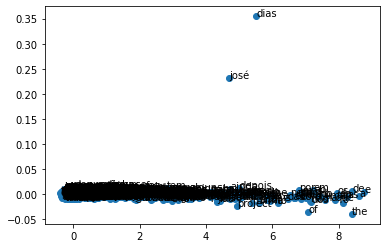

In [49]:
vocab = modelo1.wv.vocab
pca = PCA(n_components=2)
my_pca = pca.fit_transform(modelo1[vocab])
plt.scatter(my_pca[:,0],my_pca[:,1])
for i,word in enumerate(vocab):
  plt.annotate(word, xy=(my_pca[i,0],my_pca[i,1]))
plt.show()

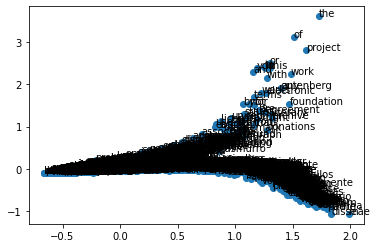

In [50]:
vocab = modelo2.wv.vocab
pca = PCA(n_components=2)
my_pca = pca.fit_transform(modelo2[vocab])
plt.scatter(my_pca[:,0],my_pca[:,1])
for i,word in enumerate(vocab):
  plt.annotate(word, xy=(my_pca[i,0],my_pca[i,1]))
plt.show()

# Duvidas?


# Pratica

Baixe um texto de sua preferência e usando o código acima faça um word embbeding e teste várias analises. Não precisa plotar um gráfico.
